<h2> Logistic-regression </h2>
<a href="https://colab.research.google.com/github/thedhruvish/ml-algorithms-project/blob/main/logistic-regression/project-Carseats.ipynb">
<img src="https://raw.githubusercontent.com/thedhruvish/dataset-machine-learning/refs/heads/main/public/colab.svg" alt="colab svg"></a>

In [200]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [201]:
df = pd.read_csv('https://raw.githubusercontent.com/thedhruvish/dataset-machine-learning/refs/heads/main/ml-algorithms-project/Carseats.csv')

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


## Change Category values to num
- Good => 0
- Medium => 1
- Bad => 2

In [203]:
df['ShelveLoc'] = df['ShelveLoc'].map({'Good':0,'Medium':1,'Bad':2})

In [204]:
# US column to convert into num
df['US'] = df['US'].map({"Yes":1,"No":0})
df['Urban'] = df['Urban'].map({"Yes":1,"No":0})

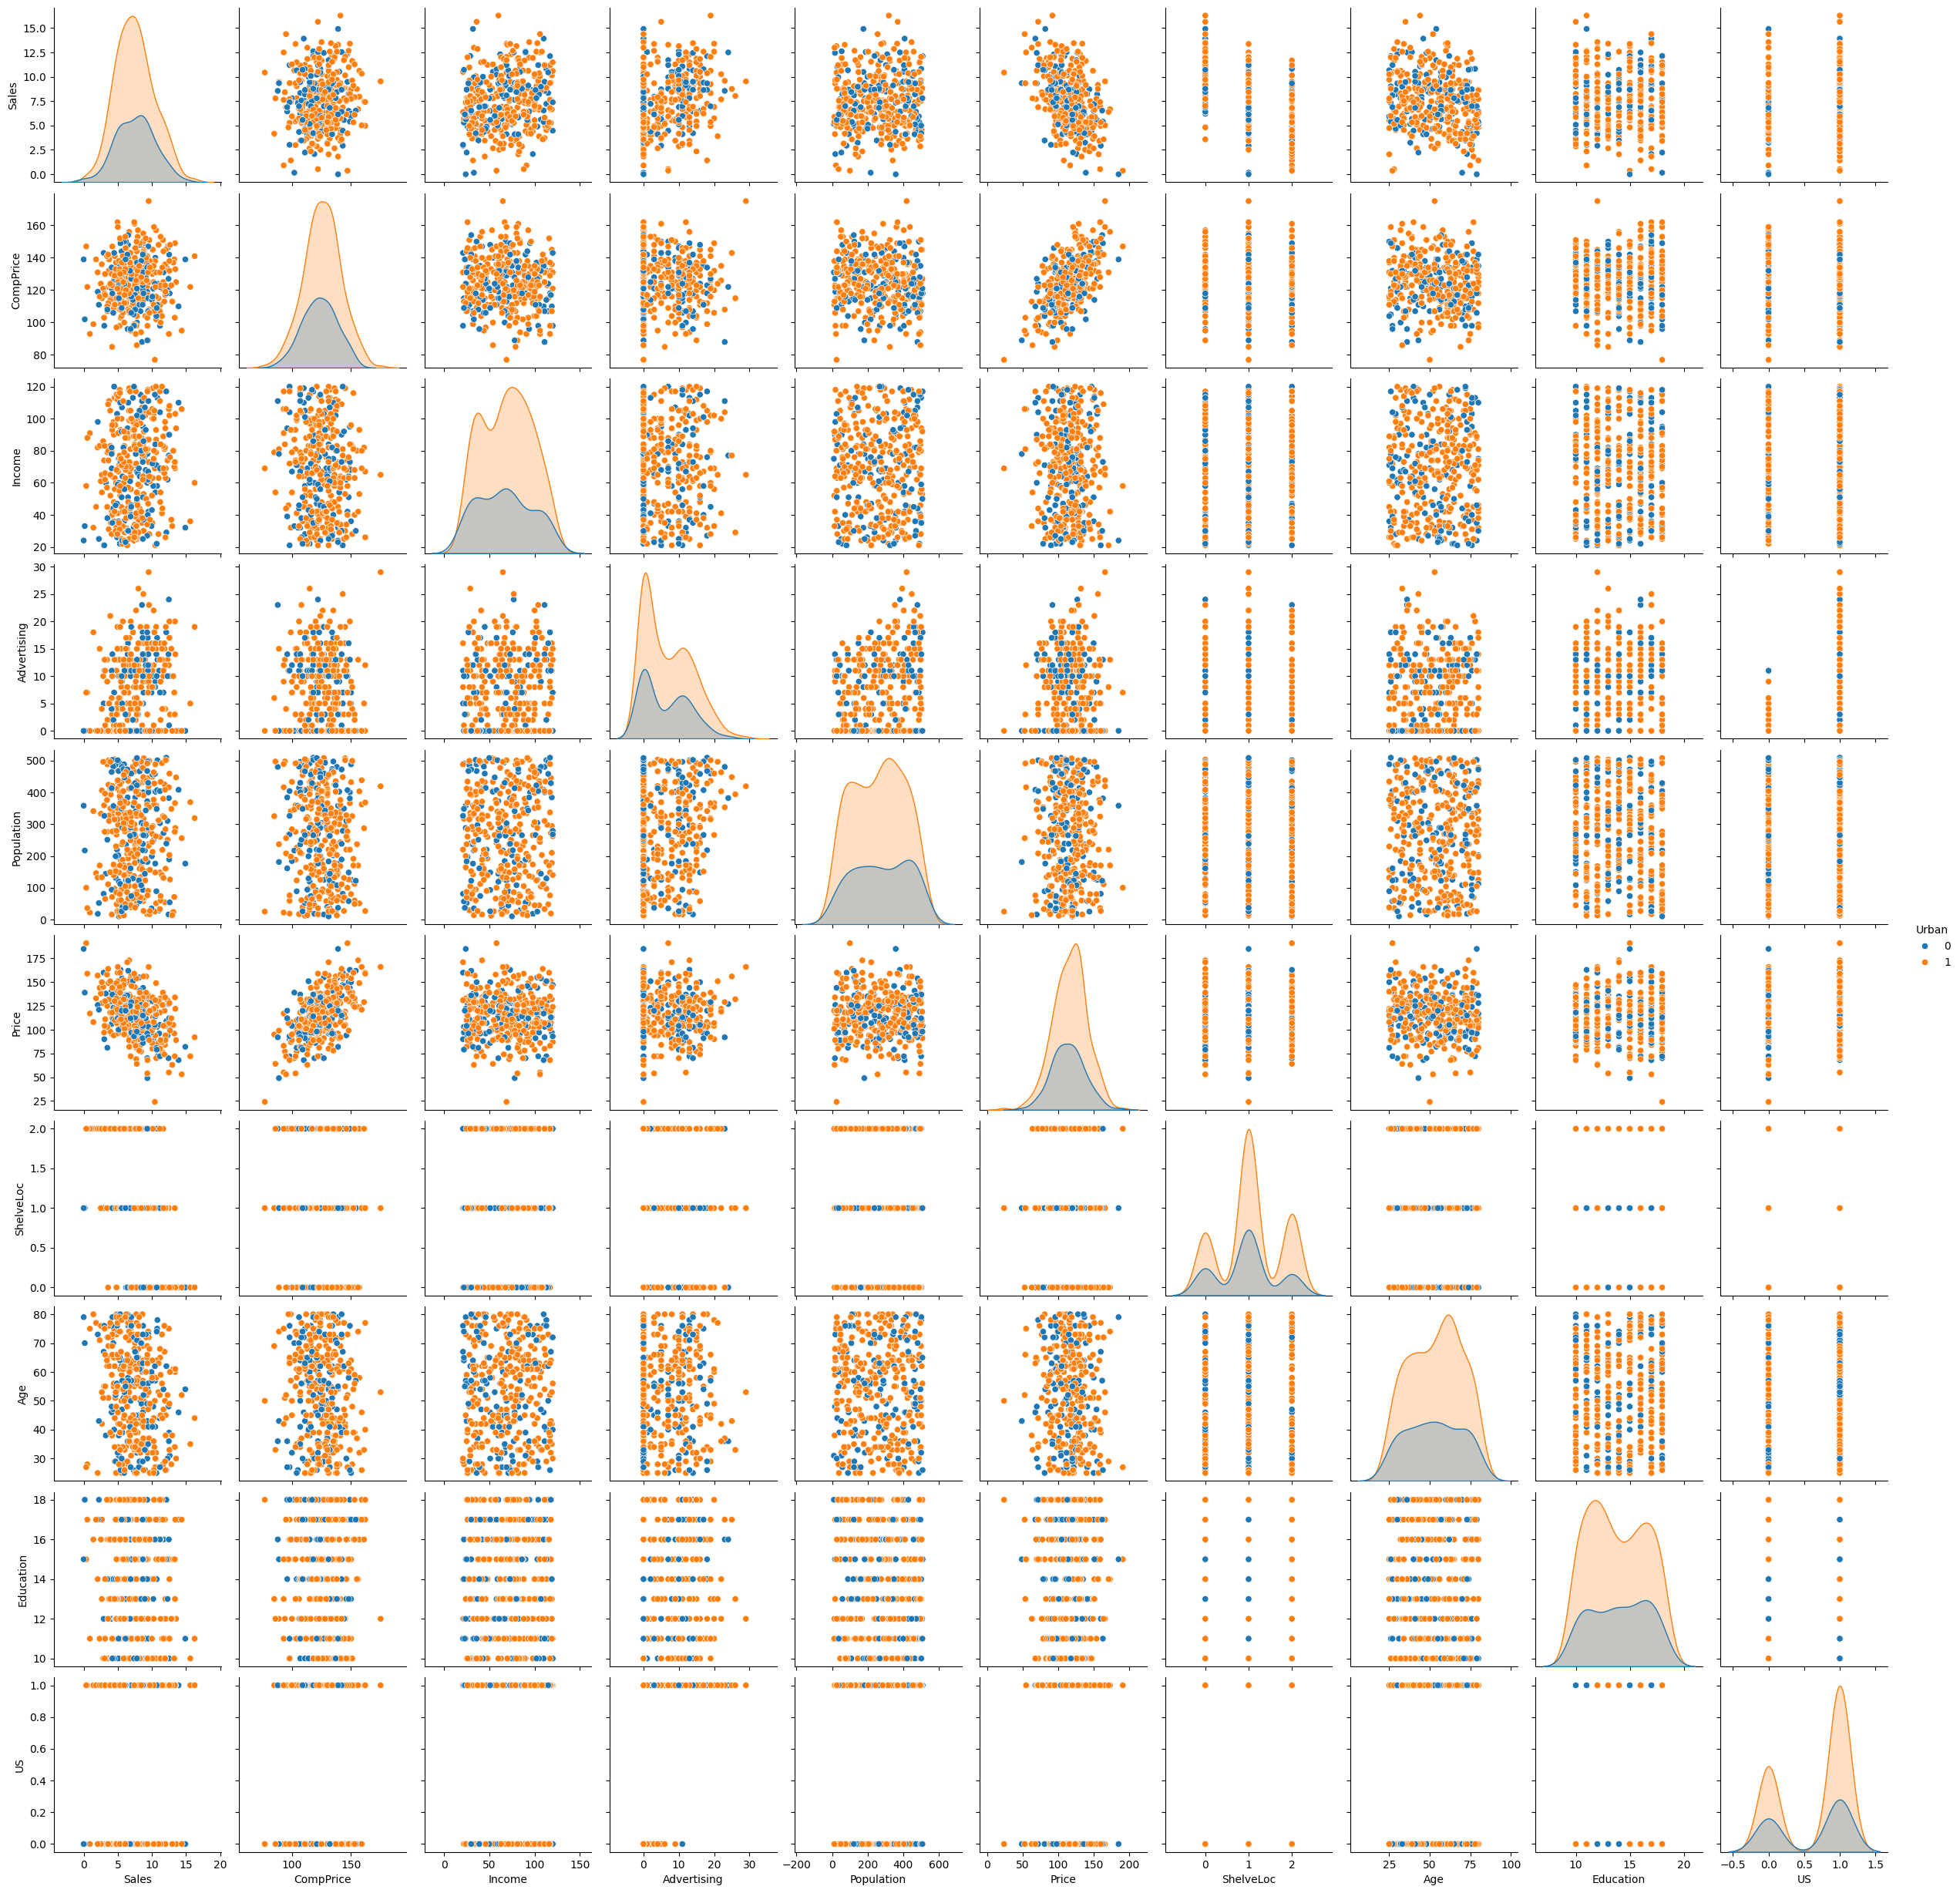

In [219]:
sns.pairplot(df,hue='Urban')

In [205]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,2,42,17,1,1
1,11.22,111,48,16,260,83,0,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,2,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,0,33,14,1,1
396,6.14,139,23,3,37,120,1,55,11,0,1
397,7.41,162,26,12,368,159,1,40,18,1,1
398,5.94,100,79,7,284,95,2,50,12,1,1


## In this to predict Urban 

In [206]:
X = df.drop(columns=['Urban'])
y = df['Urban']

In [207]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=51)

In [208]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [209]:
y_train

233    0
74     0
157    0
110    1
102    0
      ..
222    1
16     1
197    1
224    0
57     1
Name: Urban, Length: 80, dtype: int64

In [210]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [211]:
X_test = scaler.transform(X_test)

In [212]:
model.fit(X_scaled,y_train)

LogisticRegression()

In [213]:
y_pred = model.predict(X_test)

In [214]:
y_test.values

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,

In [215]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [216]:
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc:.2f}")


Accuracy: 0.59


In [217]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.28      0.27        89
           1       0.72      0.71      0.71       231

    accuracy                           0.59       320
   macro avg       0.49      0.49      0.49       320
weighted avg       0.59      0.59      0.59       320



Accuracy is

 58.75
[[ 25  64]
 [ 68 163]]


<Axes: >

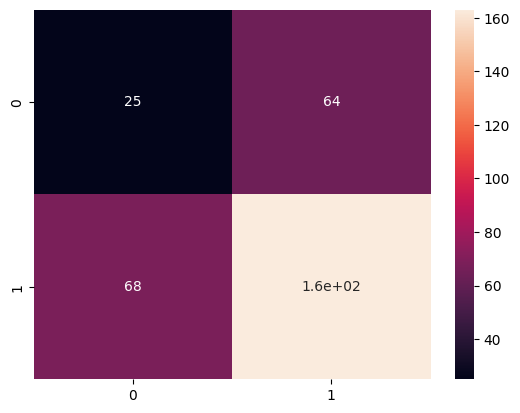

In [218]:
print("Accuracy is", model.score(X_test, y_test)*100)

cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)